## Setup

In [ ]:
!pip install apache-airflow==2.8.0
!pip install Flask-Session==0.5.0
!pip install -q pyngrok
!pip install -q pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 17.5 MB/s e

In [ ]:
import sqlite3
import pandas as pd
from pyngrok import ngrok

port = 8082

In [ ]:
from google.colab import userdata
ngrok_token = userdata.get('ngrok')

In [ ]:
!ngrok config add-authtoken {ngrok_token}

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!export SLUGIFY_USES_TEXT_UNIDECODE=yes
#!echo "\rload_examples = False" >> /root/airflow/airflow.cfg
!AIRFLOW_HOME="/root/airflow/"

In [ ]:
!airflow db init

DB: sqlite:////root/airflow/airflow.db
[2024-10-24T20:20:10.386+0000] {migration.py:215} INFO - Context impl SQLiteImpl.
[2024-10-24T20:20:10.389+0000] {migration.py:218} INFO - Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running stamp_revision  -> 10b52ebd31f7
WARNI [airflow.models.crypto] empty cryptography key - values will not be stored encrypted.
Initialization done


In [ ]:
!airflow users create \
    --username admin \
    --firstname hoang \
    --lastname nguyen \
    --role Admin \
    --email hoang.h.nguyen@utah.edu

/usr/local/lib/python3.10/dist-packages/flask_limiter/extension.py:333 UserWarning: Using the in-memory storage for tracking rate limits as no storage was explicitly specified. This is not recommended for production use. See: https://flask-limiter.readthedocs.io#configuring-a-storage-backend for documentation about configuring the storage backend.
[2024-10-24T20:20:19.377+0000] {override.py:1369} INFO - Inserted Role: Admin
[2024-10-24T20:20:19.394+0000] {override.py:1369} INFO - Inserted Role: Public
[2024-10-24T20:20:19.400+0000] {override.py:868} WARNING - No user yet created, use flask fab command to do it.
[2024-10-24T20:20:19.529+0000] {override.py:1769} INFO - Created Permission View: can edit on Passwords
[2024-10-24T20:20:19.551+0000] {override.py:1820} INFO - Added Permission can edit on Passwords to role Admin
[2024-10-24T20:20:19.592+0000] {override.py:1769} INFO - Created Permission View: can read on Passwords
[2024-10-24T20:20:19.615+0000] {override.py:1820} INFO - Added 

In [ ]:
%%writefile airflow_shell.sh

nohup airflow scheduler -D &
nohup airflow webserver -D --port 8082 --host 127.0.0.1 &

Writing airflow_shell.sh


In [ ]:
!chmod 755 airflow_shell.sh ## modify the file permissions for execute
!./airflow_shell.sh & # start airflow webserver and scheduler

nohup: appending output to 'nohup.out'
nohup: appending output to 'nohup.out'


In [ ]:
!cat nohup.out

In [ ]:
!rm -rf /usr/local/lib/python3.10/dist-packages/airflow/example_dags/example*.py
!rm -rf /usr/local/lib/python3.10/dist-packages/airflow/example_dags/tutorial*.py

In [ ]:
!mkdir /root/airflow/dags/
!mkdir /root/airflow/data/

In [ ]:
public_url = ngrok.connect(port).public_url
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}\"".format(public_url, port))

 * ngrok tunnel "https://867d5aa1fbbe.ngrok.app" -> "http://127.0.0.1:8082"


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import userdata
alpha = userdata.get('alpha')

In [ ]:
!pip install google-cloud-bigquery

In [ ]:
import pandas as pd
from google.cloud import bigquery

In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/fall-2024-de-434803-f810aed8bf0a.json"

##Annual HPI Methods

In [ ]:
%%writefile /root/airflow/dags/annual_hpi_pipeline.py

from airflow import DAG
from airflow.operators.python import PythonOperator
from datetime import datetime, timedelta
import pandas as pd
import sqlite3
import requests
import os
from google.colab import drive
from google.cloud import bigquery

# Path to your service account key file within Google Drive (update if needed)
service_account_key_path = '/content/fall-2024-de-434803-255fc5d8138e.json'

# Verify if the file exists
if not os.path.exists(service_account_key_path):
  raise FileNotFoundError(f"Service account key file not found at: {service_account_key_path}")

# Set the environment variable for Google Cloud credentials
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = service_account_key_path

# Construct a BigQuery client object (no need for auth.authenticate_user())
client = bigquery.Client()

# Replace with your actual API key @ https://www.alphavantage.co/
alpha = 'alpha_vantage'

default_args = {
    'owner': 'airflow',
    'depends_on_past': False,
    'start_date': datetime(2023, 10, 26),
    'email_on_failure': False,
    'email_on_retry': False,
    'retries': 1,
    'retry_delay': timedelta(minutes=5),
}

# Task 1
def extract_annual_csv_data():
  try:
      file_path = '/content/drive/MyDrive/Colab Notebooks/Project/hpi_master.csv'
      # Load the CSV file
      my_csv = pd.read_csv(file_path)

      # Check if required columns exist
      required_columns = ['yr', 'period', 'hpi_type', 'hpi_flavor', 'frequency', 'level',
                          'place_name', 'place_id', 'index_nsa', 'index_sa']
      if not all(column in my_csv.columns for column in required_columns):
          raise ValueError(f"The CSV file is missing required columns: {set(required_columns) - set(my_csv.columns)}")

      # Perform aggregation
      yearly_agg = my_csv.groupby('yr').agg({
          'period': 'first',
          'hpi_type': 'first',
          'hpi_flavor': 'first',
          'frequency': 'first',
          'level': 'first',
          'place_name': 'first',
          'place_id': 'first',
          'index_nsa': 'mean',
          'index_sa': 'mean',
      }).reset_index()

      # Replace 'Frequency' with 'annually'
      yearly_agg['frequency'] = yearly_agg['frequency'].replace('monthly', 'annually')

      # Create the 'date' column
      yearly_agg['date'] = pd.to_datetime(yearly_agg['yr'].astype(str) + '-' + yearly_agg['period'].astype(str), format='%Y-%m')
      yearly_agg = yearly_agg.rename(columns={'yr': 'year'})

      # Filter out rows with NaN in 'index_sa'
      filtered_csv = yearly_agg[yearly_agg['index_sa'].notna()]

      return filtered_csv

  except FileNotFoundError:
      print(f"Error: The file '{file_path}' does not exist. Please check the file path.")
      return pd.DataFrame()
  except Exception as e:
      print(f"An error occurred: {e}")
      return pd.DataFrame()

# Task 2
def get_inflation_data():
  # The inflation_url parameter is not used, so the URL is hardcoded here instead.
  # Make sure this URL is correct and includes your API key.
  inflation_url = f'https://www.alphavantage.co/query?function=INFLATION&apikey={alpha}'
  response = requests.get(inflation_url)

  # Check if the request was successful
  if response.status_code == 200:
    inflation_data = response.json()
    # Check if the 'data' key exists before accessing it
    if 'data' in inflation_data:
      return pd.DataFrame(inflation_data['data'])
    else:
      # Print error message or raise an exception if 'data' key is not found
      print(f"Error: 'data' key not found in response. Response content: {inflation_data}")
      return pd.DataFrame()  # Return an empty DataFrame to avoid further errors
  else:
    # Print error message if the request was not successful
    print(f"Error: API request failed with status code {response.status_code}. Response content: {response.text}")
    return pd.DataFrame()  # Return an empty DataFrame to avoid further errors

# Task 3
def get_cpi_data():
  # Update API Key
  cpi_url = f'https://www.alphavantage.co/query?function=CPI&interval=annual&apikey={alpha}'  # Replace with your API Key
  response = requests.get(cpi_url)

  # Check if the request was successful
  if response.status_code == 200:
    cpi_data = response.json()

    # Check if 'data' key is present before accessing it.
    if 'data' in cpi_data:
      return pd.DataFrame(cpi_data['data'])
    else:
      # Handle the case where 'data' key is not found
      print(f"Error: 'data' key not found in CPI response. Response content: {cpi_data}")
      # Raise an exception or return an empty DataFrame
      # raise KeyError("'data' key not found in CPI response.")
      return pd.DataFrame()
  else:
    # Print an error message if the request was not successful
    print(f"Error: API request failed with status code {response.status_code}. Response content: {response.text}")
    return pd.DataFrame()

# Task 4
def get_gdp_data():
  gdp_url = f'https://www.alphavantage.co/query?function=REAL_GDP&interval=annual&apikey={alpha}' # make sure api key is correct
  response = requests.get(gdp_url)
  gdp_data = response.json()

  # Check if the 'data' key exists before accessing it
  if 'data' in gdp_data:
    return pd.DataFrame(gdp_data['data'])
  else:
    # Print error message or raise an exception if 'data' key is not found
    print(f"Error: 'data' key not found in GDP response. Response content: {gdp_data}")
    # raise KeyError("'data' key not found in GDP response.")
    return pd.DataFrame()  # Return an empty DataFrame to avoid further errors

# Task 5
def get_gdp_per_capita_data():
  capita_url = f'https://www.alphavantage.co/query?function=REAL_GDP_PER_CAPITA&apikey={alpha}'
  response = requests.get(capita_url)
  capita_data = response.json()
  # Check if the 'data' key exists before accessing it
  if 'data' in capita_data:
    return pd.DataFrame(capita_data['data'])
  else:
    # Print error message or raise an exception if 'data' key is not found
    print(f"Error: 'data' key not found in GDP Per Capita response. Response content: {capita_data}")
    # raise KeyError("'data' key not found in GDP Per Capita response.")
    return pd.DataFrame()  # Return an empty DataFrame to avoid further errors

# Task 6
def get_unemployment_data():
  unemp_url = f'https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey={alpha}'
  response = requests.get(unemp_url)
  unemployment_data = response.json()
  # Check if the 'data' key exists before accessing it
  if 'data' in unemployment_data:
    return pd.DataFrame(unemployment_data['data'])
  else:
    # Print an error message or handle the case where 'data' is missing
    print(f"Error: 'data' key not found in unemployment data response: {unemployment_data}")
    # raise KeyError("'data' key not found in unemployment data response")
    return pd.DataFrame()  # Return an empty DataFrame to avoid further errors

# Task 7
def merge_api_data(**kwargs):
  ti = kwargs['ti']
  inflation_df = ti.xcom_pull(task_ids='get_inflation_data')
  cpi_df = ti.xcom_pull(task_ids='get_cpi_data')
  gpd_df = ti.xcom_pull(task_ids='get_gdp_data')
  gpd_per_capita_df = ti.xcom_pull(task_ids='get_gdp_per_capita_data')
  unemployment_df = ti.xcom_pull(task_ids='get_unemployment_data')

  # Merging the dataframes
  merged_cpi = pd.merge(cpi_df, inflation_df, on='date', how='inner')
  merged_gdp = pd.merge(gpd_df, gpd_per_capita_df, on='date', how='inner')
  merged_cgp = pd.merge(merged_cpi, merged_gdp, on='date', how='inner')
  merged_data = pd.merge(merged_cgp, unemployment_df, on='date', how='inner')

  # Rename the columns using a dictionary
  merged_data = merged_data.rename(columns={
      'date': 'date',
      'value_x_x': 'cpi',
      'value_y_x': 'inflation',
      'value_x_y': 'gdp',
      'value_y_y': 'gdp_per_capita',
      'value' : 'unemployment'
  })

  # Convert the 'Inflation' column to numeric
  merged_data['inflation'] = pd.to_numeric(merged_data['inflation'], errors='coerce')
  merged_data['cpi'] = pd.to_numeric(merged_data['cpi'], errors='coerce')
  merged_data['gdp'] = pd.to_numeric(merged_data['gdp'], errors='coerce')
  merged_data['gdp_per_capita'] = pd.to_numeric(merged_data['gdp_per_capita'], errors='coerce')
  merged_data['unemployment'] = pd.to_numeric(merged_data['unemployment'], errors='coerce')

  # Round the Inflation column to two decimal places
  merged_data['inflation'] = merged_data['inflation'].round(3)
  return merged_data

# Task 8 - Merge Flat & API Dataframe
def merge_csv_and_api_data(**kwargs):
  # Define Xcom method
  ti = kwargs['ti']
  api_df = ti.xcom_pull(task_ids='merge_api_data')
  aggregated_data = ti.xcom_pull(task_ids='extract_annual_csv_data')

  # Convert 'Date' column in aggregated_data to datetime if it's not already
  api_df['date'] = pd.to_datetime(api_df['date'])
  # Convert 'Date' column in merged_df to datetime if it's not already
  aggregated_data['date'] = pd.to_datetime(aggregated_data['date'])
  merged_hpi_cpi = pd.merge(aggregated_data, api_df, on='date', how='inner')

  merged_hpi_cpi = merged_hpi_cpi.rename(columns={
      'yr': 'year'
  })
  merged_hpi_cpi = merged_hpi_cpi.sort_values(by='date')

  # Convert 'GDP(billions)' to numeric before rounding
  merged_hpi_cpi['gdp'] = pd.to_numeric(merged_hpi_cpi['gdp'], errors='coerce')
  merged_hpi_cpi['gdp'] = merged_hpi_cpi['gdp'].round(2)
  merged_hpi_cpi['inflation'] = merged_hpi_cpi['inflation'].round(3)
  merged_hpi_cpi['index_nsa'] = merged_hpi_cpi['index_nsa'].round(2)
  merged_hpi_cpi['index_sa'] = merged_hpi_cpi['index_sa'].round(2)
  merged_hpi_cpi = merged_hpi_cpi.drop(columns=['period']) # drop period column
  merged_hpi_cpi = merged_hpi_cpi.drop(columns=['place_name']) # drop level column
  merged_hpi_cpi = merged_hpi_cpi.drop(columns=['place_id']) # drop place_id column
  # merged_hpi_cpi = merged_hpi_cpi.drop(columns=['date'])

  return merged_hpi_cpi
l

# Task 9
def create_sqlite_database(**kwargs):
  ti = kwargs['ti']
  merged_final_df = ti.xcom_pull(task_ids='merge_csv_and_api_data')

  # Create a connection to a SQLite database (or connect to an existing one)
  conn = sqlite3.connect('/root/airflow/data/hpi_data.db')  # Use a more appropriate path if needed

  try:
      # Create a cursor object to execute SQL commands
      cursor = conn.cursor()

      # Create a table named 'annual_hpi'
      cursor.execute('''
          CREATE TABLE IF NOT EXISTS annual_hpi (
                year INTEGER,
                hpi_type TEXT,
                hpi_flavor TEXT,
                frequency TEXT,
                level TEXT,
                index_nsa FLOAT,
                index_sa FLOAT,
                cpi FLOAT,
                inflation FLOAT,
                gdp_billions FLOAT,
                gdp_Per_Capita FLOAT,
                unemployment FLOAT
          )
      ''')
      conn.commit()

      # Insert data into the table
      merged_final_df.to_sql('annual_hpi', conn, if_exists='replace', index=False)
      conn.commit()

  finally:
      # Always close the connection after completing operations
      conn.commit()
  return 'Database updated successfully'

# Task 10
def upload_to_bigquery(**kwargs):
  # Create a BigQuery client
  client = bigquery.Client()
  ti = kwargs['ti']
  merged_final_df = ti.xcom_pull(task_ids='merge_csv_and_api_data')

  # Define dataset and table
  dataset_id = 'hpi_data'
  table_id = 'annual_hpi'
  # table_id = 'monthly_hpi'

  # Upload DataFrame to BigQuery
  merged_final_df.to_gbq(destination_table=f'{dataset_id}.{table_id}',
            project_id='fall-2024-de-434803',
            if_exists='replace')  # Options: 'fail', 'replace', 'append'

  print(f'Data uploaded to BigQuery table: {dataset_id}.{table_id}')

with DAG('annual_hpi_pipeline', default_args=default_args, schedule_interval=None, catchup=False) as dag:
  task_1 = PythonOperator(
      task_id='extract_annual_csv_data',
      python_callable=extract_annual_csv_data
  )
  task_2 = PythonOperator(
      task_id='get_inflation_data',
      python_callable=get_inflation_data
  )
  task_3 = PythonOperator(
      task_id='get_cpi_data',
      python_callable=get_cpi_data
  )
  task_4 = PythonOperator(
      task_id='get_gdp_data',
      python_callable=get_gdp_data
  )
  task_5 = PythonOperator(
      task_id='get_gdp_per_capita_data',
      python_callable=get_gdp_per_capita_data
  )
  task_6 = PythonOperator(
      task_id='get_unemployment_data',
      python_callable=get_unemployment_data
  )
  task_7 = PythonOperator(
      task_id='merge_api_data',
      python_callable=merge_api_data
  )
  task_8 = PythonOperator(
      task_id='merge_csv_and_api_data',
      python_callable=merge_csv_and_api_data
  )
  task_9 = PythonOperator(
      task_id='create_sqlite_database',
      python_callable=create_sqlite_database
  )
  task_10 = PythonOperator(
      task_id='upload_to_bigquery',
      python_callable=upload_to_bigquery
  )

  # Define task dependencies
  task_1  # task_1 runs first, followed by parallel tasks
  [task_2, task_3, task_4, task_5, task_6] >> task_7  # All these tasks must complete before task_7
  task_7 >> task_8 >> task_9
  task_8 >> task_10

Overwriting /root/airflow/dags/annual_hpi_pipeline.py


## Monthly HPI Functions

In [ ]:
%%writefile /root/airflow/dags/monthly_hpi_pipeline.py

from airflow import DAG
from airflow.operators.python import PythonOperator
from datetime import datetime, timedelta
import pandas as pd
import sqlite3
import requests
import os
from google.colab import drive
from google.cloud import bigquery

# Path to your service account key file within Google Drive (update if needed)
service_account_key_path = '/content/fall-2024-de-434803-255fc5d8138e.json'

# Verify if the file exists
if not os.path.exists(service_account_key_path):
  raise FileNotFoundError(f"Service account key file not found at: {service_account_key_path}")

# Set the environment variable for Google Cloud credentials
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = service_account_key_path

# Construct a BigQuery client object (no need for auth.authenticate_user())
client = bigquery.Client()

# Replace with your actual API key @ https://www.alphavantage.co/
alpha = 'alpha_vantage'

default_args = {
    'owner': 'airflow',
    'depends_on_past': False,
    'start_date': datetime(2023, 10, 26),
    'email_on_failure': False,
    'email_on_retry': False,
    'retries': 1,
    'retry_delay': timedelta(minutes=5),
}

with DAG('monthly_hpi_pipeline', default_args=default_args, schedule_interval=None, catchup=False) as dag:

    # Task 1
    def extract_monthly_csv_data():  # Remove file_path from the arguments
      file_path = '/content/drive/MyDrive/Colab Notebooks/Project/hpi_master.csv'
      # Load the CSV file
      my_csv = pd.read_csv(file_path)
      csv_data = pd.DataFrame(my_csv)
      # Combine 'yr' and 'period' into a 'date' column
      csv_data['date'] = pd.to_datetime(csv_data['yr'].astype(str) + '-' + csv_data['period'].astype(str), format='%Y-%m')

      aggregated_data = csv_data.rename(columns={
      'yr': 'year',
      'index_nsa': 'index_not_seasonal_adjusted',
      'index_sa': 'index_seasonal_adjusted'
      })
      return aggregated_data

    aggregated_data = extract_monthly_csv_data()

    # Task 2
    def get_cpi_data(**kwargs):
        cpi_url = f'https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey={alpha}'
        response = requests.get(cpi_url)
        if response.status_code == 200:
            cpi_data = response.json()
            if 'data' in cpi_data:
                return pd.DataFrame(cpi_data['data'])
            else:
                print(f"Error: 'data' key not found in CPI response. Response content: {cpi_data}")
                return pd.DataFrame()
        else:
            print(f"Error: API request failed with status code {response.status_code}. Response content: {response.text}")
            return pd.DataFrame()

    # Task 3
    def get_unemployment_data(**kwargs):
        unemp_url = f'https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey={alpha}'
        response = requests.get(unemp_url)
        unemployment_data = response.json()
        if 'data' in unemployment_data:
            return pd.DataFrame(unemployment_data['data'])
        else:
            print(f"Error: 'data' key not found in unemployment data response: {unemployment_data}")
            return pd.DataFrame()

    # Task 4
    def merge_api_data(**kwargs):
        ti = kwargs['ti']
        cpi_df = ti.xcom_pull(task_ids='get_cpi_data')
        unemployment_df = ti.xcom_pull(task_ids='get_unemployment_data')

        merged_api_data = pd.merge(cpi_df, unemployment_df, on='date', how='inner')
        merged_api_data = merged_api_data.rename(columns={
            'value_x': 'cpi',
            'value_y': 'unemployment'
        })

        merged_api_data['cpi'] = pd.to_numeric(merged_api_data['cpi'], errors='coerce')  # Convert to float
        merged_api_data['unemployment'] = pd.to_numeric(merged_api_data['unemployment'], errors='coerce')  # Convert to float
        merged_api_data['cpi'] = merged_api_data['cpi'].round(2)
        merged_api_data['date'] = pd.to_datetime(merged_api_data['date'])

        # merged_api_data['year'] = merged_api_data['date'].dt.year
        return merged_api_data

    # Task 5
    def merge_csv_and_api_data(**kwargs):
        # Define Xcom method
        ti = kwargs['ti']
        aggregated_data = ti.xcom_pull(task_ids='extract_monthly_csv_data')
        merged_api_data = ti.xcom_pull(task_ids='merge_api_data')

        merged_final_df = pd.merge(aggregated_data, merged_api_data, on='date', how='inner')
        # merged_final_df = merged_final_df.drop(columns=['date'])
        # merged_final_df = merged_final_df.drop(columns=['year'])
        merged_final_df['index_seasonal_adjusted'] = merged_final_df['index_seasonal_adjusted'].fillna(0)

        merged_final_df.sort_values('date')
        merged_final_df.sort_values('frequency')
        return merged_final_df

    # Task 6
    def create_sqlite_database(**kwargs):
        ti = kwargs['ti']
        merged_final_df = ti.xcom_pull(task_ids='merge_csv_and_api_data')

        conn = sqlite3.connect('/root/airflow/data/hpi_data.db')
        cursor = conn.cursor()
        cursor.execute('''
            CREATE TABLE IF NOT EXISTS monthly_hpi (
                hpi_type TEXT,
                hppi_flavor TEXT,
                frequency TEXT,
                level TEXT,
                place_name TEXT,
                place_id TEXT,
                year INTEGER,
                period INTEGER,
                index_nsa FLOAT,
                index_sa FLOAT,
                date DATE,
                cpi FLOAT,
                unemployment FLOAT
            )
        ''')
        conn.commit()
        merged_final_df.to_sql('monthly_hpi', conn, if_exists='replace', index=False)
        conn.commit()
        return 'Database updated successfully'

    def upload_to_bigquery(**kwargs):
      # Create a BigQuery client
      client = bigquery.Client()
      ti = kwargs['ti']
      merged_final_df = ti.xcom_pull(task_ids='merge_csv_and_api_data')

      # Define dataset and table
      dataset_id = 'hpi_data'
      table_id = 'monthly_hpi'
      # table_id = 'monthly_hpi'

      # Upload DataFrame to BigQuery
      merged_final_df.to_gbq(destination_table=f'{dataset_id}.{table_id}',
                project_id='fall-2024-de-434803',
                if_exists='replace')  # Options: 'fail', 'replace', 'append'

      print(f'Data uploaded to BigQuery table: {dataset_id}.{table_id}')

    # Remove 'rename_columns_task' as it's not needed.
    extract_monthly_csv_data_task = PythonOperator(
        task_id='extract_monthly_csv_data',
        python_callable=extract_monthly_csv_data
    )

    get_cpi_data_task = PythonOperator(
        task_id='get_cpi_data',
        python_callable=get_cpi_data
    )

    get_unemployment_data_task = PythonOperator(
        task_id='get_unemployment_data',
        python_callable=get_unemployment_data
    )

    merge_api_data_task = PythonOperator(
        task_id='merge_api_data',
        python_callable=merge_api_data
    )

    merge_csv_and_api_data_task = PythonOperator(
        task_id='merge_csv_and_api_data',
        python_callable=merge_csv_and_api_data
    )

    create_sqlite_database_task = PythonOperator(
        task_id='create_sqlite_database',
        python_callable=create_sqlite_database
    )
    upload_to_bigquery_task = PythonOperator(
        task_id='upload_to_bigquery',
        python_callable=upload_to_bigquery
    )

    extract_monthly_csv_data_task
    [get_cpi_data_task, get_unemployment_data_task] >> merge_api_data_task
    merge_api_data_task >> merge_csv_and_api_data_task
    merge_csv_and_api_data_task >> create_sqlite_database_task
    merge_csv_and_api_data_task >> upload_to_bigquery_task

Overwriting /root/airflow/dags/monthly_hpi_pipeline.py


##Query monthly_hpi and annual_hpi table

In [ ]:
# prompt: read monthly_hpi and annual_hpi data into dataframe

import pandas as pd
import sqlite3

# Assuming you have already created the database and the monthly_hpi table
conn = sqlite3.connect('/root/airflow/data/hpi_data.db')

# Read monthly_hpi data into a DataFrame
monthly_hpi_df = pd.read_sql_query("SELECT * FROM monthly_hpi", conn)

# Read annual_hpi data into a DataFrame
annual_hpi_df = pd.read_sql_query("SELECT * FROM annual_hpi", conn)

# Now you have the data in two DataFrames: monthly_hpi_df and annual_hpi_df
monthly_hpi_df

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,year,period,index_not_seasonal_adjusted,index_seasonal_adjusted,date,cpi,unemployment
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00,1991-01-01 00:00:00,134.60,6.4
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.89,100.94,1991-02-01 00:00:00,134.80,6.6
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.30,100.90,1991-03-01 00:00:00,135.00,6.8
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.69,100.97,1991-04-01 00:00:00,135.20,6.7
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.30,101.32,1991-05-01 00:00:00,135.60,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126478,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2023,2,212.50,200.60,2023-02-01 00:00:00,300.84,3.6
126479,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2023,3,192.69,194.02,2023-03-01 00:00:00,301.84,3.5
126480,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2023,4,195.61,201.86,2023-04-01 00:00:00,303.36,3.4
126481,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,1,208.24,215.30,2024-01-01 00:00:00,308.42,3.7


In [ ]:
annual_hpi_df

,year,hpi_type,hpi_flavor,frequency,level,index_nsa,index_sa,cpi,inflation,gdp,gdp_per_capita,unemployment
0,1991,traditional,purchase-only,annually,USA or Census Division,100.71,100.47,134.600,4.235,10044.24,39451.0,6.4
1,1992,traditional,purchase-only,annually,USA or Census Division,103.38,102.92,138.100,3.029,10398.05,40051.0,7.3
2,1993,traditional,purchase-only,annually,USA or Census Division,106.15,105.63,142.600,2.952,10684.18,40829.0,7.3
3,1994,traditional,purchase-only,annually,USA or Census Division,109.79,109.74,146.200,2.607,11114.65,41713.0,6.6
4,1995,traditional,purchase-only,annually,USA or Census Division,112.80,113.03,150.300,2.805,11413.01,42654.0,5.6
5,1996,traditional,purchase-only,annually,USA or Census Division,116.70,116.65,154.400,2.931,11843.60,43259.0,5.6
6,1997,traditional,purchase-only,annually,USA or Census Division,120.38,120.26,159.100,2.338,12370.30,44590.0,5.3
7,1998,traditional,purchase-only,annually,USA or Census Division,126.08,126.09,161.600,1.552,12924.88,46204.0,4.6
8,1999,traditional,purchase-only,annually,USA or Census Division,132.10,133.98,164.300,2.188,13543.77,47880.0,4.3
9,2000,traditional,purchase-only,annually,USA or Census Division,139.86,143.50,168.800,3.377,14096.03,49335.0,4.0


## Analysis

In [ ]:
# prompt: show hpi and cpi percentage between 1991 and 2023

import sqlite3
import pandas as pd

# Assuming you have already created the database and the monthly_hpi table
conn = sqlite3.connect('/root/airflow/data/hpi_data.db')

# Read monthly_hpi data into a DataFrame
monthly_hpi_df = pd.read_sql_query("SELECT * FROM annual_hpi", conn)

# Filter the DataFrame for the years 1991 to 2023
df_filtered = monthly_hpi_df[(monthly_hpi_df['year'] >= 1991) & (monthly_hpi_df['year'] <= 2023)]

# Calculate the percentage change in CPI and HPI from 1991 to 2023
if not df_filtered.empty:
    initial_cpi = df_filtered[df_filtered['year'] == 1991]['cpi'].iloc[0]
    final_cpi = df_filtered[df_filtered['year'] == 2023]['cpi'].iloc[-1]
    initial_gdp = df_filtered[df_filtered['year'] == 1991]['gdp'].iloc[0]
    final_gdp = df_filtered[df_filtered['year'] == 2023]['gdp'].iloc[-1]

    initial_hpi = df_filtered[df_filtered['year'] == 1991]['index_sa'].iloc[0]
    final_hpi = df_filtered[df_filtered['year'] == 2023]['index_sa'].iloc[-1]
    initial_gdp_per_capita = df_filtered[df_filtered['year'] == 1991]['gdp'].iloc[0]
    final_gdp_per_capita = df_filtered[df_filtered['year'] == 2023]['gdp_per_capita'].iloc[0]

    cpi_percentage_change = ((final_cpi - initial_cpi) / initial_cpi) * 100
    hpi_percentage_change = ((final_hpi - initial_hpi) / initial_hpi) * 100
    gdp_percentage_change = ((final_gdp - initial_gdp) / initial_gdp) * 100
    gdp_percentage_change = ((final_gdp_per_capita - initial_gdp_per_capita) / initial_gdp_per_capita) * 100

    print(f"CPI Percentage Change (1991-2023): {cpi_percentage_change:.2f}%")
    print(f"HPI Percentage Change (1991-2023): {hpi_percentage_change:.2f}%")
    print(f"GDP Percentage Change (1991-2023): {gdp_percentage_change:.2f}%")
    print(f"GDP Per Capita Percentage Change (1991-2023): {gdp_percentage_change:.2f}%")
else:
    print("No data found for the specified years.")

CPI Percentage Change (1991-2023): 122.27%
HPI Percentage Change (1991-2023): 313.46%
GDP Percentage Change (1991-2023): 566.72%
GDP Per Capita Percentage Change (1991-2023): 566.72%


In [ ]:
# prompt: show salt lake city hpi and cpi percentage between 1991 and 2023

# Assuming you have already created the database and the monthly_hpi table
conn = sqlite3.connect('/root/airflow/data/hpi_data.db')

# Read monthly_hpi data into a DataFrame
monthly_hpi_df = pd.read_sql_query("SELECT * FROM monthly_hpi", conn)

# Filter the DataFrame for Salt Lake City and the years 1991 to 2023
salt_lake_city_df = monthly_hpi_df[
    (monthly_hpi_df['place_name'] == 'Salt Lake City, UT') &
    (monthly_hpi_df['year'] >= 1991) &
    (monthly_hpi_df['year'] <= 2023)
]

# Calculate the percentage change in CPI and HPI from 1991 to 2023 for Salt Lake City
if not salt_lake_city_df.empty:
    initial_cpi = salt_lake_city_df[salt_lake_city_df['year'] == 1991]['cpi'].iloc[0]
    final_cpi = salt_lake_city_df[salt_lake_city_df['year'] == 2023]['cpi'].iloc[-1]

    initial_hpi = salt_lake_city_df[salt_lake_city_df['year'] == 1991]['index_not_seasonal_adjusted'].iloc[0]
    final_hpi = salt_lake_city_df[salt_lake_city_df['year'] == 2023]['index_not_seasonal_adjusted'].iloc[-1]

    cpi_percentage_change = ((final_cpi - initial_cpi) / initial_cpi) * 100
    hpi_percentage_change = ((final_hpi - initial_hpi) / initial_hpi) * 100

    print(f"Salt Lake City CPI Percentage Change (1991-2023): {cpi_percentage_change:.2f}%")
    print(f"Salt Lake City HPI Percentage Change (1991-2023): {hpi_percentage_change:.2f}%")
else:
    print("No data found for Salt Lake City for the specified years.")

Salt Lake City CPI Percentage Change (1991-2023): 125.38%
Salt Lake City HPI Percentage Change (1991-2023): 1055.76%


In [ ]:
# prompt: what is salt lake city hpi and cpi in 1991 and 2023

# Assuming you have already created the database and the monthly_hpi table
conn = sqlite3.connect('/root/airflow/data/hpi_data.db')

# Read monthly_hpi data into a DataFrame
monthly_hpi_df = pd.read_sql_query("SELECT * FROM monthly_hpi", conn)

# Filter the DataFrame for Salt Lake City and the years 1991 and 2023
salt_lake_city_1991 = monthly_hpi_df[
    (monthly_hpi_df['place_name'] == 'Salt Lake City, UT') &
    (monthly_hpi_df['year'] == 1991)
]

salt_lake_city_2023 = monthly_hpi_df[
    (monthly_hpi_df['place_name'] == 'Salt Lake City, UT') &
    (monthly_hpi_df['year'] == 2023)
]

if not salt_lake_city_1991.empty and not salt_lake_city_2023.empty:
  hpi_1991 = salt_lake_city_1991['index_not_seasonal_adjusted'].iloc[0]
  cpi_1991 = salt_lake_city_1991['cpi'].iloc[0]
  hpi_2023 = salt_lake_city_2023['index_not_seasonal_adjusted'].iloc[-1]
  cpi_2023 = salt_lake_city_2023['cpi'].iloc[-1]

  print(f"Salt Lake City HPI in 1991: {hpi_1991}")
  print(f"Salt Lake City CPI in 1991: {cpi_1991}")
  print(f"Salt Lake City HPI in 2023: {hpi_2023}")
  print(f"Salt Lake City CPI in 2023: {cpi_2023}")
else:
  print("No data found for Salt Lake City for the specified years.")

Salt Lake City HPI in 1991: 64.49
Salt Lake City CPI in 1991: 134.6
Salt Lake City HPI in 2023: 745.35
Salt Lake City CPI in 2023: 303.36


In [ ]:
# prompt: when did hpi passed cpi

import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('/root/airflow/data/hpi_data.db')

# Read the monthly_hpi data into a pandas DataFrame
monthly_hpi_df = pd.read_sql_query("SELECT * FROM annual_hpi", conn)

# Filter for the first time HPI passed CPI
filtered_df = monthly_hpi_df[monthly_hpi_df['index_sa'] > monthly_hpi_df['cpi']]

# If there are any rows where HPI passed CPI, get the earliest date
if not filtered_df.empty:
  earliest_date = filtered_df['year'].min()
  print(f"HPI first passed CPI on: {earliest_date}")
  latest_date = filtered_df['year'].max()
  print(f"HPI last passed CPI on: {latest_date}")
else:
  print("HPI never passed CPI based on the data in the database.")

conn.close()

HPI first passed CPI on: 2004
HPI last passed CPI on: 2023


In [ ]:
# prompt: show correlation analysis

# Assuming you have already created the database and the monthly_hpi table
import sqlite3
import pandas as pd

conn = sqlite3.connect('/root/airflow/data/hpi_data.db')

# Read monthly_hpi data into a DataFrame
monthly_hpi_df = pd.read_sql_query("SELECT * FROM monthly_hpi", conn)

# Read annual_hpi data into a DataFrame
annual_hpi_df = pd.read_sql_query("SELECT * FROM annual_hpi", conn)

# Correlation analysis for annual data
# Removed 'GDP_billions', 'GDP_Per_Capita' from the column list as they are not present in the DataFrame
correlation_matrix_annual = annual_hpi_df[['index_nsa', 'index_sa', 'cpi', 'inflation', 'gdp', 'gdp_per_capita', 'unemployment']].corr()

# Correlation analysis for monthly data (if you want to analyze it)
# Changed the column names to match the actual column names in the DataFrame
correlation_matrix_monthly = monthly_hpi_df[['index_not_seasonal_adjusted', 'index_seasonal_adjusted', 'cpi', 'unemployment']].corr()

# Close the database connection
# conn.close()

In [ ]:
correlation_matrix_annual

,index_nsa,index_sa,cpi,inflation,gdp,gdp_per_capita,unemployment
index_nsa,1.000000,0.998040,0.939896,0.323063,0.940137,0.946757,-0.344884
index_sa,0.998040,1.000000,0.929433,0.338434,0.933054,0.939534,-0.375648
cpi,0.939896,0.929433,1.000000,0.100858,0.988517,0.977843,-0.193738
inflation,0.323063,0.338434,0.100858,1.000000,0.090884,0.109537,-0.235167
gdp,0.940137,0.933054,0.988517,0.090884,1.000000,0.995680,-0.257167
gdp_per_capita,0.946757,0.939534,0.977843,0.109537,0.995680,1.000000,-0.301452
unemployment,-0.344884,-0.375648,-0.193738,-0.235167,-0.257167,-0.301452,1.000000


In [ ]:
correlation_matrix_monthly

,index_not_seasonal_adjusted,index_seasonal_adjusted,cpi,unemployment
index_not_seasonal_adjusted,1.000000,0.418145,0.739244,-0.264269
index_seasonal_adjusted,0.418145,1.000000,0.338810,-0.122625
cpi,0.739244,0.338810,1.000000,-0.255111
unemployment,-0.264269,-0.122625,-0.255111,1.000000


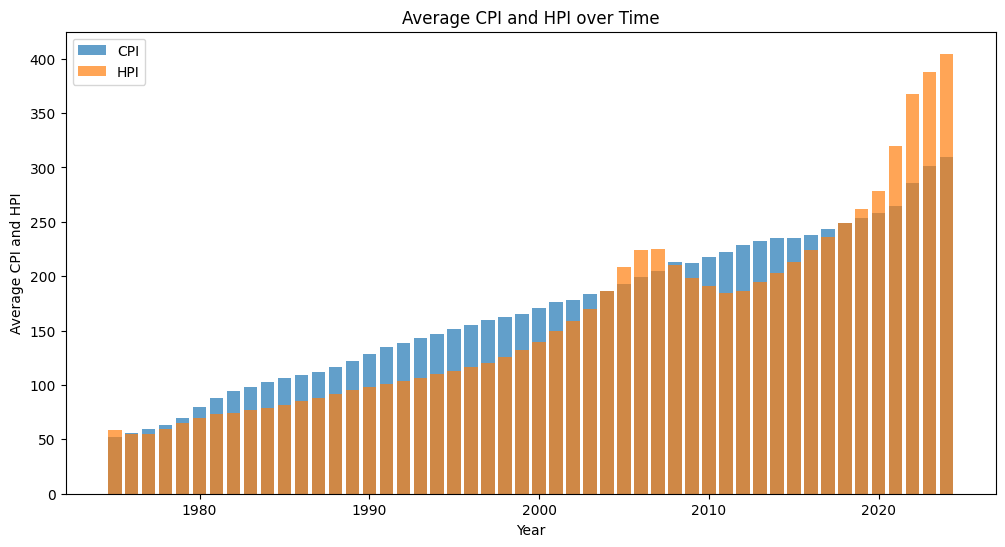

In [ ]:
# prompt: generate hpi and cpi bar graph

import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('/root/airflow/data/hpi_data.db')

# Read the monthly_hpi data into a DataFrame
monthly_hpi_df = pd.read_sql_query("SELECT * FROM monthly_hpi", conn)

# Convert 'cpi' and 'index_not_seasonal_adjusted' to numeric,
# errors='coerce' will replace non-numeric values with NaN
monthly_hpi_df['cpi'] = pd.to_numeric(monthly_hpi_df['cpi'], errors='coerce')
monthly_hpi_df['index_not_seasonal_adjusted'] = pd.to_numeric(monthly_hpi_df['index_not_seasonal_adjusted'], errors='coerce')

# Group the data by year and calculate the average CPI and HPI
yearly_data = monthly_hpi_df.groupby('year').agg({'cpi': 'mean', 'index_not_seasonal_adjusted': 'mean'})

# Create a bar graph for CPI and HPI
plt.figure(figsize=(12, 6))
plt.bar(yearly_data.index, yearly_data['cpi'], label='CPI', alpha=0.7)
plt.bar(yearly_data.index, yearly_data['index_not_seasonal_adjusted'], label='HPI', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Average CPI and HPI')
plt.title('Average CPI and HPI over Time')
plt.legend()
plt.show()

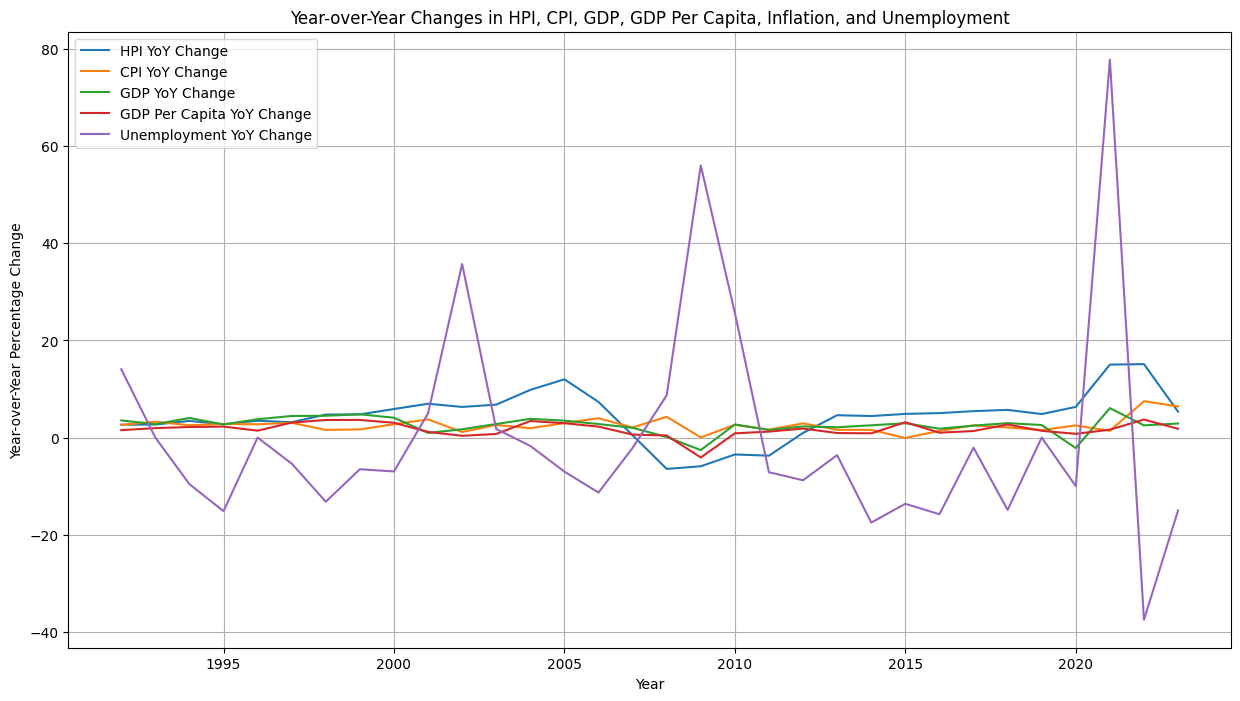

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect('/root/airflow/data/hpi_data.db')

# Read the annual_hpi data into a DataFrame
annual_hpi_df = pd.read_sql_query("SELECT * FROM annual_hpi", conn)

# Convert relevant columns to numeric, errors='coerce' will replace
# non-numeric values with NaN
for col in ['index_nsa', 'cpi', 'gdp', 'gdp_per_capita']:
    annual_hpi_df[col] = pd.to_numeric(annual_hpi_df[col], errors='coerce')

# Calculate year-over-year percentage changes for relevant columns
annual_hpi_df['hpi_yoy_change'] = annual_hpi_df['index_nsa'].pct_change() * 100
annual_hpi_df['cpi_yoy_change'] = annual_hpi_df['cpi'].pct_change() * 100
annual_hpi_df['gdp_yoy_change'] = annual_hpi_df['gdp'].pct_change() * 100
annual_hpi_df['gdp_per_capita_yoy_change'] = annual_hpi_df['gdp_per_capita'].pct_change() * 100
# annual_hpi_df['inflation'] = annual_hpi_df['inflation'].pct_change() * 100
annual_hpi_df['unemployment'] = annual_hpi_df['unemployment'].pct_change() * 100

# Create a figure and axes
plt.figure(figsize=(15, 8))

# Plot year-over-year changes
plt.plot(annual_hpi_df['year'], annual_hpi_df['hpi_yoy_change'], label='HPI YoY Change')
plt.plot(annual_hpi_df['year'], annual_hpi_df['cpi_yoy_change'], label='CPI YoY Change')
plt.plot(annual_hpi_df['year'], annual_hpi_df['gdp_yoy_change'], label='GDP YoY Change')
plt.plot(annual_hpi_df['year'], annual_hpi_df['gdp_per_capita_yoy_change'], label='GDP Per Capita YoY Change')
plt.plot(annual_hpi_df['year'], annual_hpi_df['unemployment'], label='Unemployment YoY Change')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Year-over-Year Percentage Change')
plt.title('Year-over-Year Changes in HPI, CPI, GDP, GDP Per Capita, Inflation, and Unemployment')
plt.legend()
plt.grid(True)
plt.show()

## Export Data

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/Project/Data_Engineering_Project.ipynb" ./
!jupyter nbconvert --to html "Data_Engineering_Project.ipynb"

[NbConvertApp] Converting notebook GCP_Annual & Monthly HPI Pipelines.ipynb to html
[NbConvertApp] Writing 1018407 bytes to GCP_Annual & Monthly HPI Pipelines.html
